<a href="https://colab.research.google.com/github/drewwint/ABCD-Repronim-ML/blob/main/week3/week_3_unsup_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Tutorial Problems: Week 3

This week we will mainly focus on using Nilearn, a high-level specialized neuroimaging library for Python, to perform typical Machine Learning tasks we saw in the lectures. It will allow us to avoid many of the low-level details we have to keep in mind when creating complex models in software such as sk-learn, and can provide a reliable workflow for many neuroimaging use-cases.

The examples and questions we are covering in this week's tutorial are largely adapted from the [Nilearn usage examples](https://nilearn.github.io/auto_examples/). It is a great resource! We encourage you to scan through these examples and see if you find any methods that are relevant to your own research or to project month :) 

Once you complete this exercise please save your work as either a Python (.py) or a Jupyter Notebook (.ipynb) file and push your script up to your GitHub account. If you don't already have a GitHub account you can sign up for one [here](https://github.com/join). If you are not familiar with using git or GitHub, you can view our Main Course instructional video [here](https://youtu.be/SyKmry47SsY). Once you have done this, please copy and paste the link to your GitHub file [here](https://docs.google.com/forms/d/e/1FAIpQLSfYuXDN8HGoyUZVcu9yLzrGjYgW_fQmSSBFcYWBLTp8EIOO4Q/viewform?usp=sf_link).

# Machine Learning for Neuroimaging: Unsupervised ML

## Question 1: Independent Component Analysis

This question is adapted from the Nilearn tutorial: https://nilearn.github.io/auto_examples/03_connectivity/plot_compare_decomposition.html#sphx-glr-auto-examples-03-connectivity-plot-compare-decomposition-py

As we saw in the lecture, ICA is a computational method for separating a multivariate signal into additive subcomponents. We will derive spatial maps from group fMRI data using ICA using the nilearn library. This extracts distributed brain regions that exhibit similar BOLD fluctuations over time.

CanICA is an ICA method for group-level analysis of fMRI data developed by (Varoquaux, 2010): https://hal.inria.fr/hal-00489507/.
The Development dataset from Nilearn is a movie watching based brain development dataset (fMRI).

**Your task:**
* Read, as a minimum, the abstract, "Reproducibility results', and 'Factors impacting reproducibility' sections of the paper. Describe at least two ways the authors attempted (and what they measured) to gauge the reproducibility of their results.

In [2]:
## Your answer here.
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 3.6 MB/s 
     |████████████████████████████████| 38.1 MB 2.0 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


We begin by loading the brain development fmri dataset, and visualizing the a volume in the first 4D scan:

In [3]:
from nilearn import datasets

rest_dataset = datasets.fetch_development_fmri(n_subjects=40, data_dir = 'dev_data', age_group = 'child')
func_filenames, confounds = rest_dataset.func, rest_dataset.confounds

#All the scans we downloaded
for filename in func_filenames:
    print(filename)


Dataset created in dev_data/development_fmri


Dataset created in dev_data/development_fmri/development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (4 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (4 seconds, 0 min)


 ...done. (5 seconds, 0 min)


 ...done. (4 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (5 seconds, 0 min)


 ...done. (8 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar006_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar007_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar008_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
dev_data/development_fmri/development_fmri/sub-pixar009_

First functional nifti image (4D) is at the path: dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
(50, 59, 50)


/usr/local/lib/python3.7/dist-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


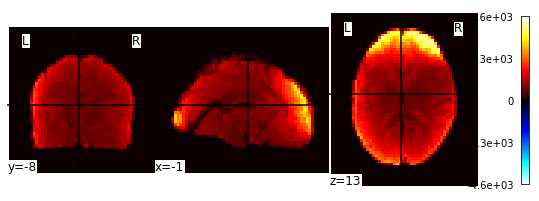

In [4]:
from nilearn import image
from nilearn import plotting

# Obtaining the path and the visualization for the first of these nifti files
print('First functional nifti image (4D) is at the path: %s' %rest_dataset.func[0])  # 4D data

first_rsn = image.index_img(rest_dataset.func[0], 0)
print(first_rsn.shape)
plotting.plot_stat_map(first_rsn)

**Your task:**
* Instantiate a CanICA model with 20 components using Nilearn, and fit it to the functional data we imported. use the 'whole-brain-template' as the masking strategy. Fit it to the data.
* Visualize the results of the canICA components using plot_prob_atlas.
* Try varying the number of components. Try at least 3 values (say n= 2, 20, 50) What do you observe in the visualizations? How would you know how many components to use in this case? How do they choose them in Varoquaux's study?

Fitting the CanICA Model to our 40 subjects...
[MultiNiftiMasker.fit] Loading data from [dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar006_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar007_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 dev_data/development_fmri/development_fmri/sub-pixar008_task-pixar_spac

/usr/local/lib/python3.7/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f612ce1c8c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


Template whole-brain mask computation


/usr/local/lib/python3.7/dist-packages/nilearn/masking.py:563: UserWarning: Persisting input arguments took 0.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  template, target_img)
/usr/local/lib/python3.7/dist-packages/joblib/memory.py:811: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f612ce1c8c0>, mask_type='whole-brain'), ignore list will not work.
  args, kwargs)
/usr/local/lib/python3.7/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f612ce1c8c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore,

[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('dev_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('dev_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('dev_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=209652396)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.5s remaining:    0.0s


_________________________________________________________fastica - 26.5s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=398764591)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.6s remaining:    0.0s


_________________________________________________________fastica - 27.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=924231285)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


_________________________________________________________fastica - 26.8s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1478610112)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


_________________________________________________________fastica - 27.6s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=441365315)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s


_________________________________________________________fastica - 26.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1537364731)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.7min remaining:    0.0s


_________________________________________________________fastica - 27.2s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=192771779)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.2min remaining:    0.0s


_________________________________________________________fastica - 27.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1491434855)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.5min remaining:    0.0s


_________________________________________________________fastica - 18.4s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=1819583497)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s


_________________________________________________________fastica - 12.4s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004127, ...,  0.002048],
       ...,
       [ 0.004933, ..., -0.001216]]), whiten=True, fun='cube', random_state=530702035)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.9min finished


_________________________________________________________fastica - 12.0s, 0.2min


/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: linewidths is ignored by contourf
  **kwargs)


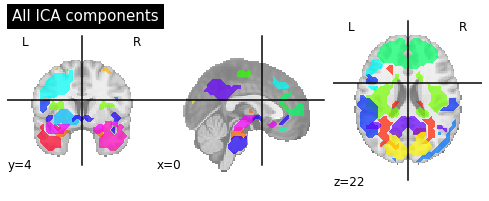

In [5]:
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas

#Your code here
func_filenames

from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas

# Create the ICA model
canica = CanICA(n_components=20,
                memory="nilearn_cache", 
                memory_level=2,
                verbose=10,
                mask_strategy='whole-brain-template',
                random_state=0)

print(f'Fitting the CanICA Model to our {len(func_filenames)} subjects...')

# Fit the model to our data
canica.fit(func_filenames)


canica_components_img = canica.components_img_
plot_prob_atlas(canica_components_img, title='All ICA components')

## Problem 2: Clustering methods to learn a brain parcellation from fMRI

In this question we are going to use a few of the clustering methods we saw in class to create a set of parcels in a brain. The content is adapted from the Nilearn tutorial: https://nilearn.github.io/dev/auto_examples/03_connectivity/plot_data_driven_parcellations.html

Firstly, we will import the libraries we need. If you don't know what they do, look up their documentation!

In [6]:
from matplotlib import patches, ticker
import matplotlib.pyplot as plt

import numpy as np
import time

from nilearn.image import get_data
from nilearn import plotting
from nilearn.regions import Parcellations
from nilearn import datasets

dataset = datasets.fetch_development_fmri(n_subjects=1)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at path: %s' %dataset.func[0])  # 4D data



Dataset created in /root/nilearn_data/development_fmri


Dataset created in /root/nilearn_data/development_fmri/development_fmri



 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


First subject functional nifti image (4D) is at path: /root/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


 ...done. (1 seconds, 0 min)


### Ward clustering

**Your task:**
* Use Nilearn's Parcellations method to instantiate a Ward Clustering model, and fit it to the data we imported. Use 1000 parcels and Full Width at Half Maximum smoothing of 2.
* Instantiate and fit a model for k-means clustering using 50 parcels and Full Width at Half Maximum smoothing of 10. Make sure the data is centered and normed.

In [7]:
ward = Parcellations(method='ward', n_parcels=1000, standardize=False, smoothing_fwhm=2.)
kmeans = Parcellations(method='kmeans', n_parcels=50, standardize=True, smoothing_fwhm=10.)

ward.fit(dataset.func)
kmeans.fit(dataset.func)

[MultiNiftiMasker.fit] Loading data from [/root/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/root/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[Parcellations] computing ward
[MultiNiftiMasker.fit] Loading data from [/root/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNi

Parcellations(method='kmeans', smoothing_fwhm=10.0, standardize=True)

If you succeeded in the last task, then you should be able to run the following cell to visualize the parcellations you just created.

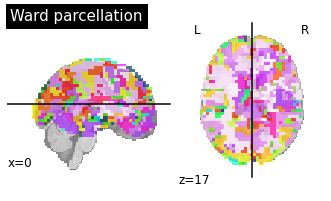

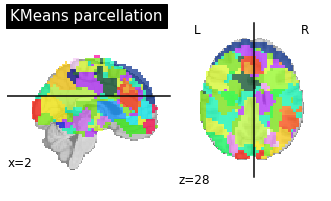

In [8]:
ward_labels_img = ward.labels_img_
kmeans_labels_img = kmeans.labels_img_

first_plot = plotting.plot_roi(ward_labels_img, title="Ward parcellation", display_mode='xz')
display = plotting.plot_roi(kmeans_labels_img, title="KMeans parcellation", display_mode='xz')


## Problem 3: Manifold Learning methods

Last week we had a question on spectral embeddings, this week we will go a bit deeper into the world of manifolds. This is adapted from: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html .

Firstly let's import the libraries we will be using. We then generate data in an S shape, and visualize it.

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

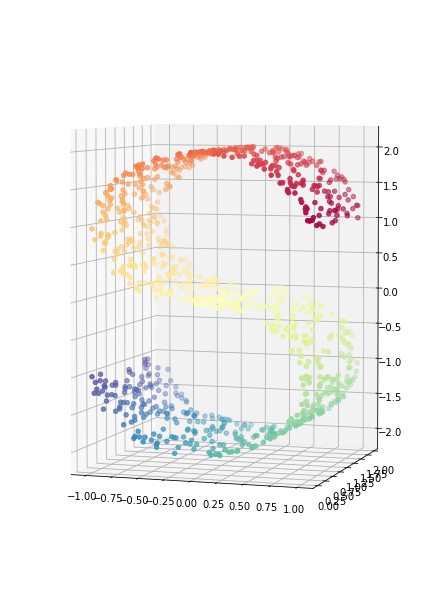

In [10]:
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(45, 24))

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

**Your task:**
* Using the libraries imported above, fit and apply three diferent manifold transformations to the S data, and plot graphs to visualize what they do. Use the same number of neighbours and components for each model. 
* Investigate the 3 methods you chose. What sort of scenarios are they typically used in?

(-0.015494609747340665,
 0.016422959043770946,
 -0.016093908212568227,
 0.01760266369647637)

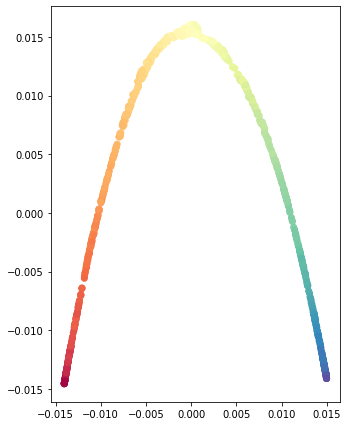

In [11]:
# Your code here
fig = plt.figure(figsize=(30, 16))

#manifold methods
#LLE = manifold.LocallyLinearEmbedding(method="standard",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="ltsa",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="hessian",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.LocallyLinearEmbedding(method="modified",n_neighbors=n_neighbors,n_components=n_components, eigen_solver="auto")
#LLE = manifold.Isomap(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.MDS(n_components=n_components, max_iter=100, n_init=1)
LLE = manifold.SpectralEmbedding(n_neighbors=n_neighbors,n_components=n_components)
#LLE = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

Y = LLE.fit_transform(X)

ax = fig.add_subplot(2, 5, 2)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.axis("tight")

# Graphical Models

- First, we are going to create an extractor from the CanICA we ran earlier
- This will allow us to create parcellated time series for each subject

In [12]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from nilearn.regions import RegionExtractor

# Create an extractor which will allow us to create ICA network timeseries
extractor = RegionExtractor(canica_components_img, 
                            threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, 
                            min_region_size=1350)

print(f'Fitting the Extactor...')

# Fit the extractor
extractor.fit()

# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_

# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

print(f'{n_regions_extracted} Regions extracted...')

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Fitting the Extactor...
29 Regions extracted...


## Generate adjacency matrices from our networks

**This takes ~2-5 minutes**

In [13]:
import os 

# Store sub (key), and adjacency matrix (val)
mat_dict = {}

# ConnectivityMeasure
connectome_measure = ConnectivityMeasure(kind='correlation')
func_filenames, confounds = rest_dataset.func, rest_dataset.confounds

# Loop through each subject
for filename, confound in zip(func_filenames, confounds):

    # Get cleaner version of subject name
    sub = filename.split(os.path.sep)[-1]
    sub = sub.split('_')[0]
    
    print(f'Creating correlation matrix for: {sub}')

    # Extract timeseries signals from our extractor
    timeseries_each_subject = extractor.transform(filename, confounds=confound)

    # Create our Connectivity Measure from this extracted time series
    mat = connectome_measure.fit_transform([timeseries_each_subject])
    mat = mat.squeeze(axis = 0)
    
    # Add to our dict
    mat_dict[sub] = mat


Creating correlation matrix for: sub-pixar001
Creating correlation matrix for: sub-pixar002
Creating correlation matrix for: sub-pixar003
Creating correlation matrix for: sub-pixar004
Creating correlation matrix for: sub-pixar005
Creating correlation matrix for: sub-pixar006
Creating correlation matrix for: sub-pixar007
Creating correlation matrix for: sub-pixar008
Creating correlation matrix for: sub-pixar009
Creating correlation matrix for: sub-pixar010
Creating correlation matrix for: sub-pixar011
Creating correlation matrix for: sub-pixar012
Creating correlation matrix for: sub-pixar013
Creating correlation matrix for: sub-pixar014
Creating correlation matrix for: sub-pixar015
Creating correlation matrix for: sub-pixar016
Creating correlation matrix for: sub-pixar017
Creating correlation matrix for: sub-pixar018
Creating correlation matrix for: sub-pixar019
Creating correlation matrix for: sub-pixar020
Creating correlation matrix for: sub-pixar021
Creating correlation matrix for: s

## Plot one of the correlation matrices

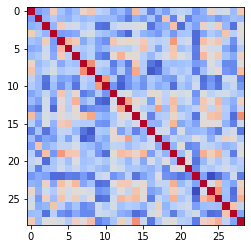

In [14]:
# YOU CODE HERE

plt.imshow(mat, cmap = 'coolwarm')

# Ridge Regression using raw connectivity

Let's suppose we believe raw connectivity may predict sex in this dataset

Go ahead and extract the data we would need to generate a 2d matrix of our data (row = subs)

**remember this is a symmetric matrix, so we should be asking do we need ALL cells in our matrix?**



In [15]:
# YOU CODE HERE

num_subs = len(mat_dict.keys())
x, y = mat.shape
num_feats = int(((x * y) - x) / 2)

mat_full = np.zeros((num_subs, num_feats))

# Generate an emptry matrix to store this data
for ind, (sub, mat) in enumerate(mat_dict.items()):
    mat_full[ind, :] = mat[np.triu_indices(mat.shape[0], k = 1)]
    
print(mat_full.shape)


(40, 406)


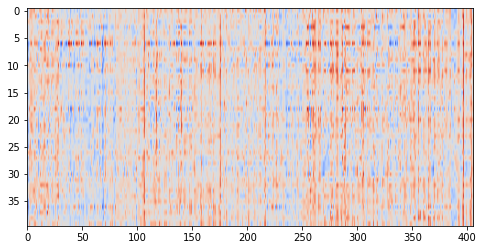

In [16]:

# We can plot this group matrix, always fun to see

fig, ax = plt.subplots(figsize = (8, 4))
ax.imshow(mat_full, aspect = 'auto', cmap = 'coolwarm')
plt.show()

In [17]:

# Lets use our raw connectivity as our data, and age is our target
X = mat_full

phen_data = rest_dataset['phenotypic']
Y = np.array([row[1] for row in phen_data])

print(f'X shape: {X.shape} Y shape: {Y.shape}')


X shape: (40, 406) Y shape: (40,)



## Fit ridge regression model to predict age


In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import r2_score

Model Score: 0.99576406148792


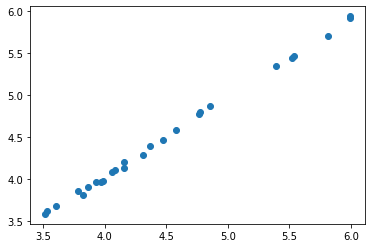

In [19]:


# Create the test train split
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.33, random_state=42)

# Create and fit the model
model = Ridge()
model.fit(X_tr, y_tr)

# Predict on our training data and plot (actual vs pred) and print the score, mse
pred = model.predict(X_tr)
plt.scatter(y_tr, pred.squeeze())

print(f'Model Score: {r2_score(y_tr, pred)}')


## Evaluate on our test data

WOW, looks like it fit our training data well, how does it generalize to our holdout test set

Model Score: -0.4349623992281202


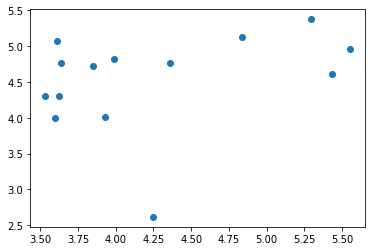

In [20]:

# Predict on our training data and plot (actual vs pred) and print the score, mse
pred = model.predict(X_te)
plt.scatter(y_te, pred.squeeze())

print(f'Model Score: {r2_score(y_te, pred)}')


### Why might we be struggling to generalize to new data?

**Which of these may be true?**

- [ ] We did not tune the shrinkage parameter in our ridge regression and there may be a better value

- [ ] Our training dataset is too small to learn a meaningfull relatioship within our data

- [ ] Our networks are not biologically plausible and do not reflect intrinstic brain networks

- [ ] There is no relationship between resting state functional connectivity and age

- [ ] There are errors within the dataset

- [ ] There may be a relationship between resting state functional connectivity and age but it is not captured within our data for many possible reasons (artifact, small sample size, batch effects, etc)

- [ ] Some measure, other than raw functional connectivity, may better elucidate variability in age and the brain at rest


# Graph Objects and Networkx


In [21]:
import networkx as nx

# What questions to ask when creating a graph from Rs-fmri?

- Is this going to be a directed or undirected graph?
- Can nodes have `self edges`
- Is this going to be a weighted or unweighted (binary) graph?
- Am I going to keep negative edge weights?
    - If I am keeping negative edges do I believe the represent?
- If I am going to binarize this graph am I using absolute or density based thresholding?

**Other things we need to think about**
- Am I going to be generating graph theory metrics, avg path length, clustering coefficients from my graphs?
- Do some metrics work only with specific types of graphs (i.e., only directed binary graphs)

**Finally, make sure you understand**
- What do the edges in my graph represent?
- What are my nodes?

Today our graphs are going to be created using the `from_numpy_matrix()` network function,

- Undirected
- Binary
- Thresholded such that weights >.2 or <-.2 are set to 1, an anything else is 0


In [22]:
# YOU CODE HERE

# Store our graphs for each subject
graphs_dict = {}

for key, val in mat_dict.items():
    
    # Apply thresholding and binarization
    val = np.abs(val)
    val[val > .2] = 1
    val[val < 1] = 0
    
    # Store graph
    g = nx.from_numpy_matrix(val)
    graphs_dict[key] = g

**Go ahead and draw our graph using the `kamada_kawai` graph layout (there are many different layouts for visualizing graph objects)**

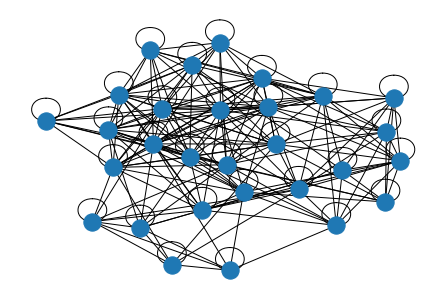

In [23]:
nx.draw_kamada_kawai(g)

# Graph theory metrics

There are several metrics we can derive that describe properties or relationships within our graphs

**Each metric describes a different property within our graph**

**It is common for us to extract these metrics to use as features for subsequent analysis**

![](https://www.researchgate.net/profile/Olaf-Sporns/publication/258205043/figure/fig8/AS:669696131080232@1536679408937/Basic-network-metrics-For-illustrative-purposes-network-measures-are-demonstrated-in-a.png)

## Go ahead and calculate the following metrics for our graphs

1. Average clustering coefficient
2. Global efficiency
3. Average degree


In [24]:

# Store these in a dict
gMetric_dict = {'clust_co': [],
                'efficiecy': [],
                'degree': []}

for sub, g in graphs_dict.items():
    gMetric_dict['clust_co'].append(nx.average_clustering(g))
    gMetric_dict['efficiecy'].append(nx.global_efficiency(g))
    gMetric_dict['degree'].append(np.mean(nx.degree(g)))
    
    


Different graph theory metrics can capture very similar information about the properties of our graph

**Before we use these features in another Ridge Model, go ahead and check (just visually) that our metrics are inherently the same**


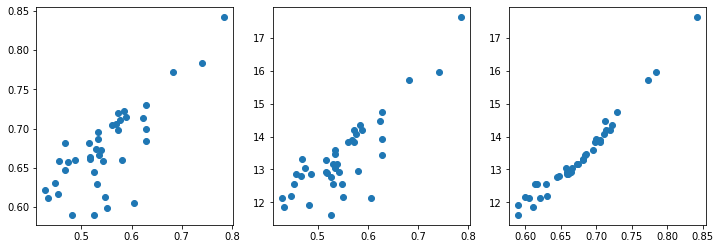

In [26]:



fig, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].scatter(gMetric_dict['clust_co'], gMetric_dict['efficiecy'])
ax[1].scatter(gMetric_dict['clust_co'], gMetric_dict['degree'])
ax[2].scatter(gMetric_dict['efficiecy'], gMetric_dict['degree'])



## And finally

We are always trying to think about how these metrics might be related to what is happening in the brain?

What might it mean for a network (or parcel if we are using parcellation and not ICA) has a high degree?

What might it mean if a network (parcel) has a short path length?

**If we specific hypothesis about the topology of our network we can derive more directed graph theory metrics!**